## **| 비지도 학습 연습 문제**
___
- 출처 : 핸즈온 머신러닝 Ch09 앙상블 학습과 랜덤 포레스트 연습문제 3, 5, 8, 10번
- 이론적 지식을 묻는 문제의 경우 텍스트 셀을 추가하여 정답을 적어주세요.

In [ ]:
# import libraries
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

### **1. k-평균을 사용할 때 적절한 클러스터 개수를 선택할 수 있는 두 가지 기법을 설명하세요.**
___



* 실루엣 점수 사용하기 (1에 가까울수록 좋음)
* ELBOW 기밥

### **2. 대규모 데이터셋으로 확장할 수 있는 군집 알고리즘 두 개를 말해보세요. 밀도가 높은 지역을 찾는 군집 알고리즘 두 개는 무엇인가요?**
___


K-평균, BIRCH, DBSCAN



### **3. 가우시안 혼합이 무엇인가요? 어떤 작업에 사용할 수 있나요?**
___


* 샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델

* 이상치 탐지, 특이치 탐지

### **4. 다음 단계를 따라 올리베티 얼굴 데이터셋을 군집해보자..**
___
전통적인 올리베티 얼굴 데이터셋은 64 X 64 픽셀 크기의 흑백 얼굴 이미지 400개를 가지고 있습니다. 사람 40명의 사진을 10장씩 찍은 것인데, 각 이미지는 4096 크기의 1D 벡터로 펼쳐져 있습니다.

#### **STEP 1. 아래 코드를 실행하여 데이터셋을 불러오세요.**

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


####  **STEP 2. 데이터셋을 훈련 세트, 검증 세트, 테스트 세트로 나누세요.**
해당 데이터셋은 매우 작으므로, `StratifiedShuffleSplit` 함수를 이용하여, 계층적 샘플링으로 각 세트에 동일한 사람의 얼굴이 고루 섞이도록 하세요.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

X, y = olivetti.data, olivetti.target

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_val_idx, test_idx in split.split(X, y):
    X_train_val, X_test = X[train_val_idx], X[test_idx]
    y_train_val, y_test = y[train_val_idx], y[test_idx]

split2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, val_idx in split2.split(X_train_val, y_train_val):
    X_train, X_val = X_train_val[train_idx], X_train_val[val_idx]
    y_train, y_val = y_train_val[train_idx], y_train_val[val_idx]

####  **STEP 3. 속도를 높이기 위해 각 학습/검증/테스트 피처 데이터셋에 PCA을 적용하여 데이터의 차원을 줄이세요.**
- `n_componets = 0.99`로 설정합니다.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99, random_state=42)
X_train_reduced = pca.fit_transform(X_train)
X_val_reduced = pca.transform(X_val)
X_test_reduced = pca.transform(X_test)

####  **STEP 4. 교재에서 다룬 방법을 사용하여 적절한 클러스터 개수를 찾고 k-평균을 사용해 이미지를 군집해보세요.**

In [41]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for k in range(5,150,5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_reduced)
    silhouette_avg = silhouette_score(X_train_reduced, kmeans.labels_)
    print(f"k={k}: silhouette_score={silhouette_avg}")

k=5: silhouette_score=0.10110718011856079
k=10: silhouette_score=0.08993853628635406
k=15: silhouette_score=0.08656027913093567
k=20: silhouette_score=0.09547719359397888
k=25: silhouette_score=0.0982646718621254
k=30: silhouette_score=0.11900259554386139
k=35: silhouette_score=0.12815895676612854
k=40: silhouette_score=0.15661415457725525
k=45: silhouette_score=0.16928830742835999
k=50: silhouette_score=0.17535606026649475
k=55: silhouette_score=0.18500253558158875
k=60: silhouette_score=0.18550769984722137
k=65: silhouette_score=0.18296784162521362
k=70: silhouette_score=0.1804092526435852
k=75: silhouette_score=0.18422727286815643
k=80: silhouette_score=0.1877586841583252
k=85: silhouette_score=0.19314317405223846
k=90: silhouette_score=0.19858218729496002
k=95: silhouette_score=0.19831791520118713
k=100: silhouette_score=0.2023717164993286
k=105: silhouette_score=0.20303668081760406
k=110: silhouette_score=0.20012593269348145
k=115: silhouette_score=0.19970349967479706
k=120: silho

In [42]:
kmeans = KMeans(n_clusters=75, random_state=42, n_init="auto")
labels = kmeans.fit_predict(X_train_reduced)
val_labels = kmeans.predict(X_train_reduced)
test_labels = kmeans.predict(X_train_reduced)

In [43]:
print("훈련 세트 클러스터 라벨 분포:", np.bincount(labels))
print("검증 세트 클러스터 라벨 분포:", np.bincount(val_labels))
print("테스트 세트 클러스터 라벨 분포:", np.bincount(test_labels))

훈련 세트 클러스터 라벨 분포: [3 2 4 4 5 5 4 2 4 5 3 3 3 3 6 3 4 6 7 7 7 2 2 3 2 2 5 2 3 7 5 3 3 3 3 7 7
 3 1 2 3 4 2 5 5 1 7 2 3 2 2 4 2 4 1 2 2 3 4 4 2 5 2 5 2 1 5 1 1 3 2 2 3 4
 1]
검증 세트 클러스터 라벨 분포: [3 2 4 4 5 5 4 2 4 5 3 3 3 3 6 3 4 6 7 7 7 2 2 3 2 2 5 2 3 7 5 3 3 3 3 7 7
 3 1 2 3 4 2 5 5 1 7 2 3 2 2 4 2 4 1 2 2 3 4 4 2 5 2 5 2 1 5 1 1 3 2 2 3 4
 1]
테스트 세트 클러스터 라벨 분포: [3 2 4 4 5 5 4 2 4 5 3 3 3 3 6 3 4 6 7 7 7 2 2 3 2 2 5 2 3 7 5 3 3 3 3 7 7
 3 1 2 3 4 2 5 5 1 7 2 3 2 2 4 2 4 1 2 2 3 4 4 2 5 2 5 2 1 5 1 1 3 2 2 3 4
 1]


####  **STEP 5. 아래 `plot_faces` 함수를 이용하여, 클러스터를 시각화하고, 각 클러스터에 비슷한 얼굴이 들어있는지 확인해보세요.**

In [44]:
# plot_faces 함수
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)

    plt.show()

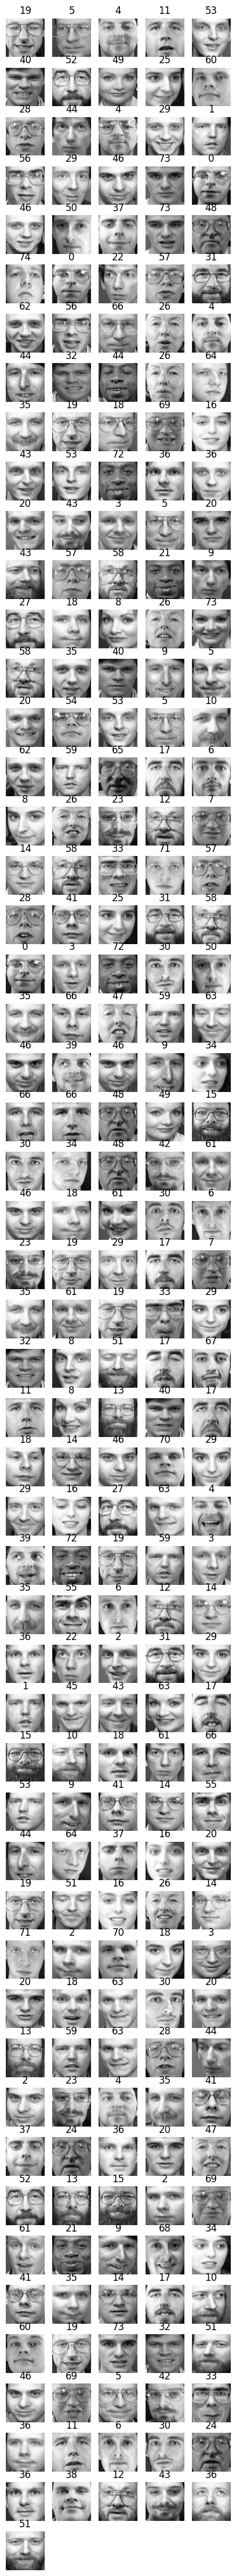

In [45]:
plot_faces(X_train, labels)